In [6]:
# Cell 1: Add the path to the package directory
import sys
import os

# Add the relative path to the package directory
sys.path.insert(0, os.path.abspath('../../'))

# Verify the path was added
print(sys.path)

# Import the package
import sub_dual_autodiff as sda


['/Users/conkey/Documents/dual_autodiff', '/Users/conkey/Documents/dual_autodiff', '/Users/conkey/Documents/dual_autodiff/docs/source', '/Users/conkey/anaconda3/lib/python310.zip', '/Users/conkey/anaconda3/lib/python3.10', '/Users/conkey/anaconda3/lib/python3.10/lib-dynload', '', '/Users/conkey/anaconda3/lib/python3.10/site-packages', '/Users/conkey/anaconda3/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-11.1-arm64.egg', '/Users/conkey/Documents/dual_autodiff_x/src']


In [19]:
# dual_autodiff.ipynb


"""
# Dual AutoDiff Tutorial

This notebook demonstrates how to use the `sub_dual_autodiff` package for automatic differentiation.

## Example 3: Basic Operations with Dual Numbers
"""

from sub_dual_autodiff import Dual
import numpy as np

# Create dual numbers
x = Dual(10, 4)  # Dual number: 10 + 4ε
y = Dual(5, 17)  # Dual number: 5 + 17ε

# Basic representation
print(f"x: {x}")
print(f"y: {y}")

# Addition
addition = x + y
print(f"Addition: {addition}")

# Subtraction
subtraction = x - y
print(f"Subtraction: {subtraction}")

# Multiplication
multiplication = x * y
print(f"Multiplication: {multiplication}")

# Division
division = x / y
print(f"Division: {division}")

"""
## Example 2: Dual Numbers and Elementary Functions
"""

# Trigonometric functions
sin_x = x.sin()
cos_x = x.cos()
tan_x = x.tan()

print(f"sin(x): {sin_x}")
print(f"cos(x): {cos_x}")
print(f"tan(x): {tan_x}")

# Exponential and logarithmic functions
exp_x = x.exp()
log_x = x.log()

print(f"exp(x): {exp_x}")
print(f"log(x): {log_x}")







x: Dual(real=10, dual=4)
y: Dual(real=5, dual=17)
Addition: Dual(real=15, dual=21)
Subtraction: Dual(real=5, dual=-13)
Multiplication: Dual(real=50, dual=190)
Division: Dual(real=2.0, dual=-6.0)
sin(x): Dual(real=-0.5440211108893698, dual=-3.3562861163058098)
cos(x): Dual(real=-0.8390715290764524, dual=2.176084443557479)
tan(x): Dual(real=0.6483608274590867, dual=5.681487050333726)
exp(x): Dual(real=22026.465794806718, dual=88105.86317922687)
log(x): Dual(real=2.302585092994046, dual=0.4)


In [10]:

import sys
import os

# Get the absolute path of dual_autodiff_x/src
dual_autodiff_x_src_path = os.path.abspath(os.path.expanduser("~/Documents/dual_autodiff_x/src"))

# Add it to the Python path
if dual_autodiff_x_src_path not in sys.path:
    sys.path.append(dual_autodiff_x_src_path)

# Now you can import sub_dual_autodiff_x
from sub_dual_autodiff_x.dual import Dual


Python version time: 0.0000024434 seconds
Cython version time: 0.0000017910 seconds


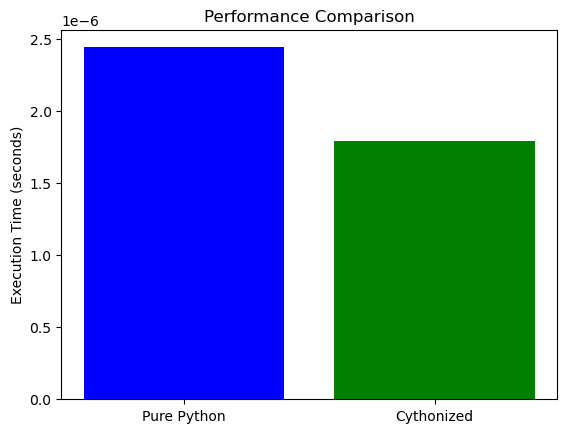

In [25]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

# Example function to benchmark
def example_function(package):
    # Import the package and call a function (replace with actual implementation)
    dual = package.Dual(2.0, 1.0)
    return dual + dual * 3.0  


# Benchmark each version
def benchmark(package, n_iter=10000):
    times = []
    for _ in range(n_iter):
        start = timeit.default_timer()
        example_function(package)
        end = timeit.default_timer()
        times.append(end - start)
    return np.mean(times)

n_trials = 1000
python_time = benchmark(sda, n_iter=n_trials)
cython_time = benchmark(sub_dual_autodiff_x.dual, n_iter=n_trials)

# Display results
print(f"Python version time: {python_time:.10f} seconds")
print(f"Cython version time: {cython_time:.10f} seconds")

# Plot the comparison
times = [python_time, cython_time]
labels = ['Pure Python', 'Cythonized']
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison')
plt.savefig("PurePython_vs_Cythonized.png")
plt.show()
